In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module
from sys import path as sysPath
from os import path as osPath
sysPath.append(osPath.join(osPath.dirname('./'), '../../src'))

from interfacePy.Axion import Axion 
from interfacePy.Cosmo import Hubble,rho_crit,h_hub
from interfacePy.FT import FT #easy tick formatting


In [3]:
theta_i, fa=0.1, 1e16

umax=500
TSTOP=1e-4
ratio_ini=1e3

N_convergence_max, convergence_lim=10, 1e-1 #this is fine, but you can experiment a bit. 

#radiation dominated example
inputFile="../../UserSpace/InputExamples/MatterInput.dat" 

In [4]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
initial_step_size=1e-1; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-1; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-11; #absolute tolerance of the RK solver
relative_tolerance=1e-11; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# Axion instance
ax1=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)

time1 = ax1.solveAxion()

ax1.relic, ax1.T_osc, ax1.theta_osc

(0.12352515376641442, 0.05917521249180621, 0.04563861313511785)

In [5]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
initial_step_size=1e-3; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-3; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-8; #absolute tolerance of the RK solver
relative_tolerance=1e-8; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# Axion instance
ax2=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)

time2 = ax2.solveAxion()

ax2.relic, ax2.T_osc, ax2.theta_osc

(0.12377305977687056, 0.05916257616293646, 0.04565063567698463)

In [15]:
(ax1.relic-ax2.relic)/(0.12)*100,len(ax1.T)-len(ax2.T),(time1-time2)

(-0.20658834204678503, 1554, 0.010577201843261719)

In [7]:
ax1.getPeaks()#this gives you the peaks of the oscillation
ax1.getPoints()#this gives you all the points of integration
ax1.getErrors()#this gives you local errors of integration

ax2.getPeaks()#this gives you the peaks of the oscillation
ax2.getPoints()#this gives you all the points of integration
ax2.getErrors()#this gives you local errors of integration

<IPython.core.display.Javascript object>


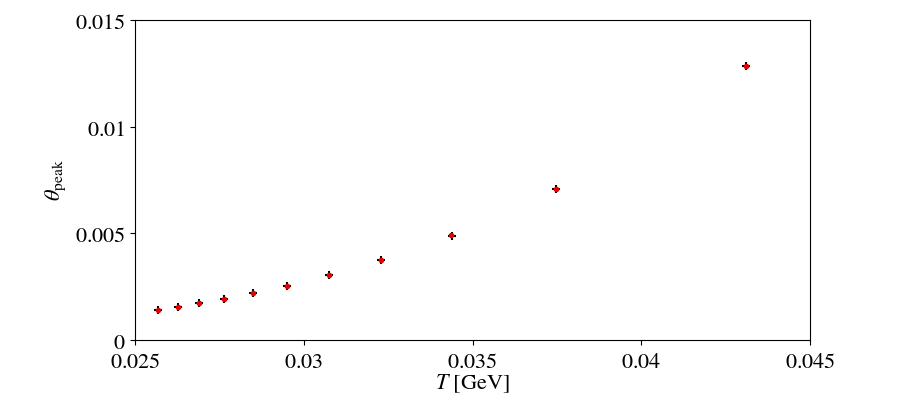

In [8]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    #this plot shows the peaks of the oscillation
    sub.scatter(ax1.T_peak,ax1.theta_peak,marker='+',color='xkcd:black')
    sub.scatter(ax2.T_peak,ax2.theta_peak,marker='.',color='xkcd:red')

    
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta_{\rm peak}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    
    #set major ticks
    _M_xticks=[ round(0.02+i*0.005,4) for i in range(0,15) ]
    _M_yticks=[ round(-0.02+i*0.005,3) for i in range(0,10)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.045,ymin=-0.0,ymax=0.015,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
#     sub.text(x=0.055,y=0.07, s=r'$T_{\rm osc}$',rotation=90)
#     sub.text(x=0.07,y=0.048, s=r'$\theta_{\rm osc}$')
    
#     sub.text(x=0.03,y=0.006, s=r'$\theta_{\rm max}$',rotation=20)
    
#     sub.text(x=0.12,y=-0.02,
#          s=r'$f_{a}=10^{16}~{\rm GeV}$'+'\n'+ r'$\theta_i = 10^{-1}$')
    
#     fig.savefig('theta_evolution.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


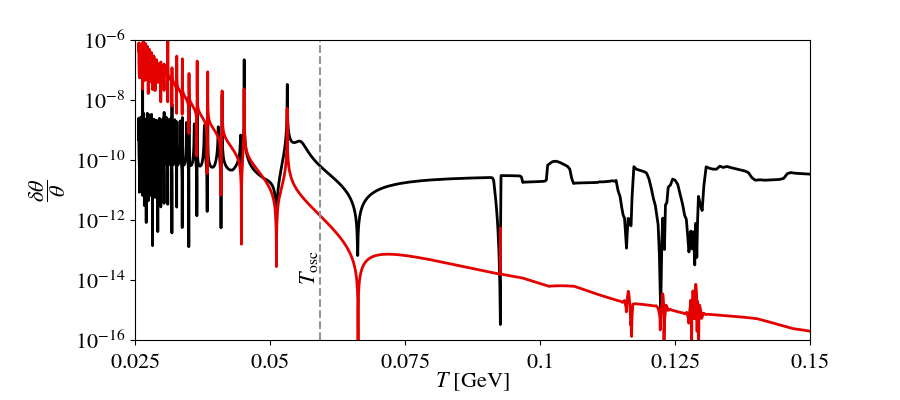

In [16]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax1.T,np.abs(ax1.dtheta/ax1.theta),linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax2.T,np.abs(ax2.dtheta/ax2.theta),linestyle='-',linewidth=2,alpha=1,c='xkcd:red')
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\delta \theta}{\theta}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    
    
    sub.axvline(ax1.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-16,-4,2)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=1e-16,ymax=1e-6,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e-14, s=r'$T_{\rm osc}$',rotation=90)
    
#     fig.savefig('local_errors.pdf',bbox_inches='tight')

    
    fig.show()


<IPython.core.display.Javascript object>


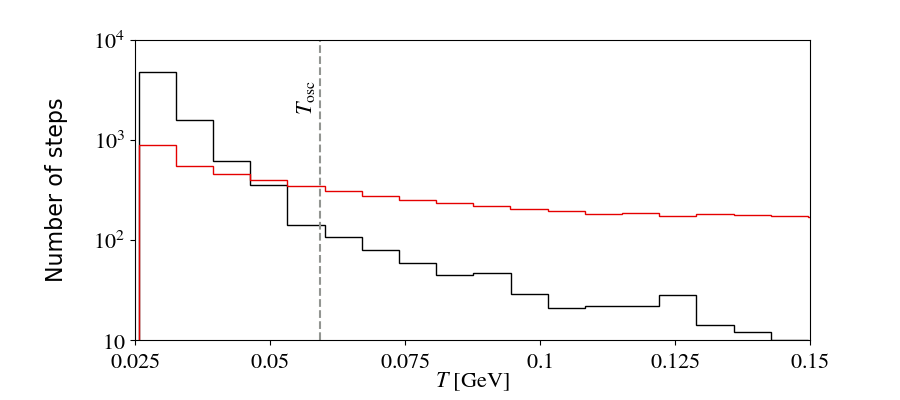

In [12]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    sub.hist(ax1.T,bins=25,color='xkcd:black',histtype='step')
    sub.hist(ax2.T,bins=25,color='xkcd:red',histtype='step')
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'Number of steps')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    


    sub.axvline(ax1.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=1e1,ymax=1e4,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.0545,y=2e3, s=r'$T_{\rm osc}$',rotation=90)

#     fig.savefig('histogram.pdf',bbox_inches='tight')

    fig.show()


In [11]:
#run the destructor
del ax1
del ax2
